In [1]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str

In [ ]:
def first_node(state: AgentState) -> AgentState:
    """First node in the graph."""
    state['final'] = f"Hi {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    """Second node in the graph."""
    state['final'] = state['final'] + f" You are {state['age']} years old."
    return state



In [ ]:
graph = StateGraph(AgentState)

graph.add_node("First", first_node)
graph.add_node("Second", second_node)

graph.set_entry_point(key='First')
graph.add_edge("First", "Second")
graph.set_finish_point(key='Second')

app = graph.compile()

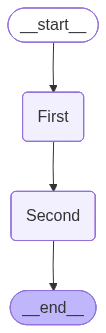

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({'name': 'John Doe', 'age': 35})

In [7]:
result

{'name': 'John Doe', 'age': 35, 'final': 'Hi John Doe You are 35 years old.'}